In [1]:
#from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Lambda, Multiply
from tensorflow.keras import backend as K
import cv2, numpy as np
import glob
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.activations import relu 
import keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import  Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract,concatenate,Add,add

from tensorflow.keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose,DepthwiseConv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
 
import os
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from  sklearn.model_selection import train_test_split

#from tensorflow.python import debug as tf_debug
import imageio
import glob
from skimage import transform as tf

from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
import scipy
import scipy
import skimage
import re
#import LRFinder
import math as m
import tensorflow as tf 
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler 
from tensorflow.keras import backend as K
from pathlib import Path
 
from tensorflow.keras import optimizers

import numpy as np
 
from keras import backend as K
from skimage.measure import compare_ssim, compare_psnr

import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

tf.random.Generator = None 
import tensorflow_addons as tfa
 

Using TensorFlow backend.


In [2]:
#from classifiers.vgg import VGGNet 

In [3]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [4]:
num_classes = 10

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
from vgg_bn   import VGG16_BN
from vgg_wbn  import VGG16_wBN  
 

In [6]:
 
weight_decay = 1e-4
lr = 1e-1
num_classes = 10
model = VGG16_wBN(input_tensor=None, input_shape=x_train.shape[1:], classes=num_classes, conv_dropout=0.1, dropout=0.3, activation='relu')


In [7]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
BATCHSIZE = 128
it_train = datagen.flow(x_train, y_train, batch_size=128)
steps = int(x_train.shape[0] / BATCHSIZE) 

it_val = datagen.flow(x_test, y_test, batch_size=128)

In [8]:
from keras.callbacks import LambdaCallback


# class MyCustomCallback(keras.callbacks.Callback):

#       def on_train_batch_begin(self, batch, logs=None):
#           print(model.layers[0].get_weights())

#       def on_train_batch_end(self, batch, logs=None):
#           print(model.layers[0].get_weights())

#   def on_test_batch_begin(self, batch, logs=None):
#     pass

#   def on_test_batch_end(self, batch, logs=None):
#     pass


# X_train = np.zeros((10,37,10))
# y_train = np.zeros((10,37,10))

# weight_print = MyCustomCallback()
# model.fit(X_train, 
#           y_train, 
#           batch_size=32, 
#           epochs=5, 
#           callbacks = [weight_print])

In [9]:
batch_print_callback = LambdaCallback(on_epoch_end=lambda epoch,logs: model.layers[0].get_weights())

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)


filepath="Bv.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

#lr_scheduler = LearningRateScheduler(lr_scheduler)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint,batch_print_callback  ]

In [11]:
len(model.layers)

55

In [12]:
# for i in range(40):
#     print(i, weights[i].shape)

In [13]:
# model.summary()

## Model Without Batch_norm

In [14]:
#optimizer = Adam(lr= 1e-3)


lra=[5e-3,1e-3,5e-4,1e-4]

ep=20
optimizer = Adam(lr= lra[3])


weights_dict = {}

weight_callback = tf.keras.callbacks.LambdaCallback \
( on_epoch_end=lambda epoch, logs: weights_dict.update({epoch:model.get_weights()}))


model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
h1=model.fit(it_train,steps_per_epoch=steps,epochs=ep, validation_data=(x_test, y_test), 
                                       callbacks = [weight_callback ]) 
 

  ...
    to  
  ['...']
Train for 390 steps, validate on 10000 samples
Epoch 1/20
390/390 [==============================] - 23s 58ms/step - loss: 2.0075 - accuracy: 0.2217 - val_loss: 2.2599 - val_accuracy: 0.1858
Epoch 2/20
390/390 [==============================] - 20s 51ms/step - loss: 1.6890 - accuracy: 0.3566 - val_loss: 1.8689 - val_accuracy: 0.3311
Epoch 3/20
390/390 [==============================] - 20s 51ms/step - loss: 1.5174 - accuracy: 0.4333 - val_loss: 2.0096 - val_accuracy: 0.3209
Epoch 4/20
390/390 [==============================] - 20s 51ms/step - loss: 1.3974 - accuracy: 0.4876 - val_loss: 1.9806 - val_accuracy: 0.3333
Epoch 5/20
390/390 [==============================] - 20s 51ms/step - loss: 1.3062 - accuracy: 0.5258 - val_loss: 1.7248 - val_accuracy: 0.3842
Epoch 6/20
390/390 [==============================] - 20s 51ms/step - loss: 1.2296 - accuracy: 0.5523 - val_loss: 1.2909 - val_accuracy: 0.5247
Epoch 7/20
390/390 [==============================] - 20s 51ms/s

In [16]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

## Model With Batch_norm


In [17]:
model = VGG16_BN(input_tensor=None, input_shape=x_train.shape[1:], classes=num_classes, conv_dropout=0.1, dropout=0.3, activation='relu')

In [18]:
#optimizer = Adam(lr= 1e-3)


lra=[5e-3,1e-3,5e-4,1e-4]



weights_dict_b = {}

weight_callback_b  = tf.keras.callbacks.LambdaCallback \
( on_epoch_end=lambda epoch, logs: weights_dict_b.update({epoch:model.get_weights()}))


 
optimizer = Adam(lr= lra[3])
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
hb1=model.fit(it_train,steps_per_epoch=steps,epochs=ep, validation_data=(x_test, y_test),
                                            callbacks = [checkpoint,weight_callback_b ]) 

  


  ...
    to  
  ['...']
Train for 390 steps, validate on 10000 samples
Epoch 1/20
390/390 [==============================] - 23s 59ms/step - loss: 2.0723 - accuracy: 0.2180 - val_loss: 3.4989 - val_accuracy: 0.1265
Epoch 2/20
390/390 [==============================] - 20s 51ms/step - loss: 1.7917 - accuracy: 0.3271 - val_loss: 2.0137 - val_accuracy: 0.2941
Epoch 3/20
390/390 [==============================] - 20s 52ms/step - loss: 1.5738 - accuracy: 0.4084 - val_loss: 1.6568 - val_accuracy: 0.3901
Epoch 4/20
390/390 [==============================] - 20s 52ms/step - loss: 1.3146 - accuracy: 0.5113 - val_loss: 1.7902 - val_accuracy: 0.4711
Epoch 5/20
390/390 [==============================] - 20s 52ms/step - loss: 1.1541 - accuracy: 0.5918 - val_loss: 1.3883 - val_accuracy: 0.5288
Epoch 6/20
390/390 [==============================] - 20s 52ms/step - loss: 1.0282 - accuracy: 0.6424 - val_loss: 1.2831 - val_accuracy: 0.5730
Epoch 7/20
390/390 [==============================] - 20s 52ms/s

In [95]:
w=list()
for epoch,weights in weights_dict.items():
    w.append(weights[18])

    
w=np.asarray(w)
w[0].shape

ics_wb=list()

for i in range(len(w)-1):
    e1=w[i]
    e2=w[i+1]
    d=e1-e2
    n=np.linalg.norm(d) 
    print(n) 

1.096405
1.0282449
1.0179783
1.022816
1.000714
1.0545996
1.0199255
1.0375018
1.060946
1.0850681
1.1303121
1.1554257
1.1317264
1.1451368
1.1482015
1.2169933
1.2286041
1.1899066
1.2607907


In [97]:
w=list()
for epoch,weights in weights_dict_b.items():
    w.append(weights[18])

    
w=np.asarray(w)
w[0].shape

ics_wb=list()

for i in range(len(w)-1):
    e1=w[i]
    e2=w[i+1]
    d=e2-e1
    n=np.linalg.norm(d) 
    print(n) 

6.5515237
9.469878
8.962917
9.782805
10.0140085
10.419768
10.452977
10.859635
11.230474
11.33438
11.686404
12.296957
12.471929
12.679999
12.723559
13.243391
13.471344
13.510953
13.457655


## Layer 14 

In [84]:
## without batch_norm
w=list()
for epoch,weights in weights_dict.items():
    w.append(weights[14])
 
w=np.asarray(w)
w[0].shape

ics_wb=list()

for i in range(len(w)-1):
    e1=w[i]
    e2=w[i+1]
    d=e1-e2
    n=np.linalg.norm(d) 
    ics_wb.append(n)
 
    
    

In [85]:
## with batch_norm

w=list()
for epoch,weights in weights_dict_b.items():
    w.append(weights[14])
 
w=np.asarray(w)
w[0].shape

ics_b=list() 
for i in range(len(w)-1):
    e1=w[i]
    e2=w[i+1]
    d=e1-e2
    n=np.linalg.norm(d) 
    ics_b.append(n)
    
    

C:\Users\compu\Anaconda3\envs\Bdeep\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  # Remove the CWD from sys.path while we load stuff.


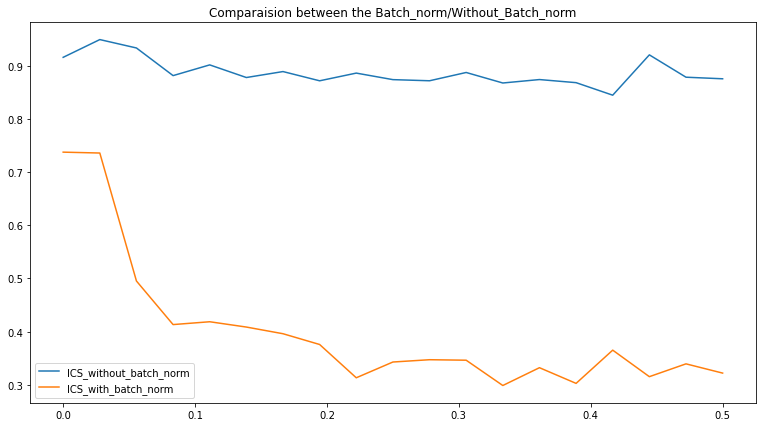

In [86]:
plt.figure(figsize=(13, 7))
figures_path='fig/' 
    
x = np.linspace(0, .5, len(ics_b))    
plt.plot(x, ics_wb, label='ICS_without_batch_norm')   
plt.plot(x, ics_b, label='ICS_with_batch_norm')   
 
plt.legend(fontsize=10)    
plt.title("Comparaision between the Batch_norm/Without_Batch_norm")   
plt.savefig(os.path.join(figures_path, 'ICS comparision.png'), dpi=500, quality=100) 

## Layer 3


In [98]:
## without batch_norm
w1=list()
for epoch,weights in weights_dict.items():
    w1.append(weights[3])
 
w1=np.asarray(w1)
w1[0].shape

ics_wb1=list()

for i in range(len(w1)-1):
    e1=w1[i]
    e2=w1[i+1]
    d=e1-e2
    n=np.linalg.norm(d) 
    ics_wb1.append(n)
 
    
    

In [99]:
## with batch_norm

w2=list()
for epoch,weights in weights_dict_b.items():
    w2.append(weights[3])
 
w2=np.asarray(w2)
w2[0].shape

ics_b1=list() 
for i in range(len(w2)-1):
    e1=w2[i]
    e2=w2[i+1]
    d=e1-e2
    n=np.linalg.norm(d) 
    ics_b1.append(n)
    
    

C:\Users\compu\Anaconda3\envs\Bdeep\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  # Remove the CWD from sys.path while we load stuff.


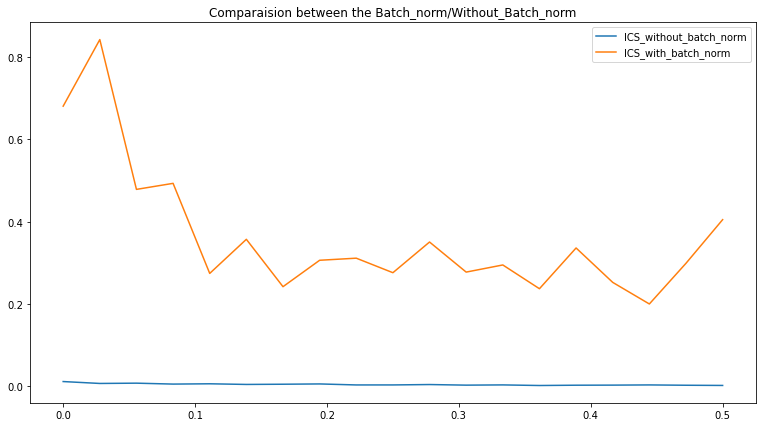

In [100]:
plt.figure(figsize=(13, 7))
figures_path='fig/' 
    
x = np.linspace(0, .5, len(ics_b1))    
plt.plot(x, ics_wb1, label='ICS_without_batch_norm')   
plt.plot(x, ics_b1, label='ICS_with_batch_norm')   
 
plt.legend(fontsize=10)    
plt.title("Comparaision between the Batch_norm/Without_Batch_norm")   
plt.savefig(os.path.join(figures_path, 'ICS comparision1.png'), dpi=500, quality=100) 

In [101]:
## without batch_norm
w1=list()
for epoch,weights in weights_dict.items():
    w1.append(weights[7])
 
w1=np.asarray(w1)
w1[0].shape

ics_wb1=list()

for i in range(len(w1)-1):
    e1=w1[i]
    e2=w1[i+1]
    d=e1-e2
    n=np.linalg.norm(d) 
    ics_wb1.append(n)
 
    
    

In [102]:
## with batch_norm

w2=list()
for epoch,weights in weights_dict_b.items():
    w2.append(weights[7])
 
w2=np.asarray(w2)
w2[0].shape

ics_b1=list() 
for i in range(len(w2)-1):
    e1=w2[i]
    e2=w2[i+1]
    d=e1-e2
    n=np.linalg.norm(d) 
    ics_b1.append(n)
    
    

C:\Users\compu\Anaconda3\envs\Bdeep\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  # Remove the CWD from sys.path while we load stuff.


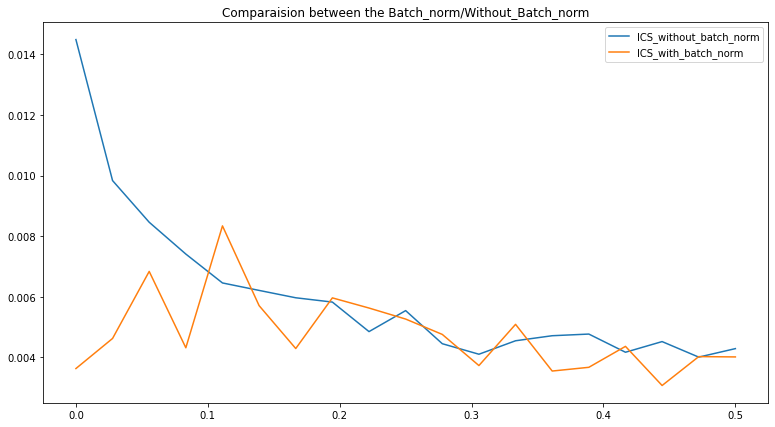

In [103]:
plt.figure(figsize=(13, 7))
figures_path='fig/' 
    
x = np.linspace(0, .5, len(ics_b1))    
plt.plot(x, ics_wb1, label='ICS_without_batch_norm')   
plt.plot(x, ics_b1, label='ICS_with_batch_norm')   
 
plt.legend(fontsize=10)    
plt.title("Comparaision between the Batch_norm/Without_Batch_norm")   
plt.savefig(os.path.join(figures_path, 'ICS comparision2.png'), dpi=500, quality=100) 

### Here, as per the paper, VGGnet shows worse covariance shift performance for batch normlalization despite the higher performance, conclude in ineffectiveness of covaraince theory for explaining batchnormalization's performance.

In [33]:
[tl,vl,ta,va]=[h1.history["loss"],h1.history["val_loss"],h1.history["accuracy"],h1.history["val_accuracy"]]
[tbl,vbl,tba,vba]=[hb1.history["loss"],hb1.history["val_loss"],hb1.history["accuracy"],hb1.history["val_accuracy"]]
figures_path='fig/'


C:\Users\compu\Anaconda3\envs\Bdeep\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  if __name__ == '__main__':


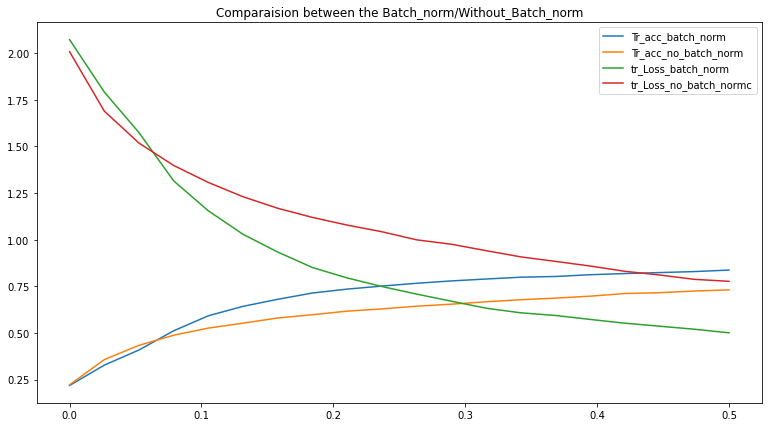

In [35]:
plt.figure(figsize=(13, 7))
x = np.linspace(0, .5, len(tl))  
plt.plot(x, tba, label='Tr_acc_batch_norm')   
plt.plot(x, ta, label='Tr_acc_no_batch_norm')   
plt.plot(x, tbl, label='tr_Loss_batch_norm')  
plt.plot(x, tl, label='tr_Loss_no_batch_normc')  
plt.legend(fontsize=10)    
plt.title("Comparaision between the Batch_norm/Without_Batch_norm")   
plt.savefig(os.path.join(figures_path, 'Standard Training.png'), dpi=500, quality=100) 


C:\Users\compu\Anaconda3\envs\Bdeep\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  # Remove the CWD from sys.path while we load stuff.


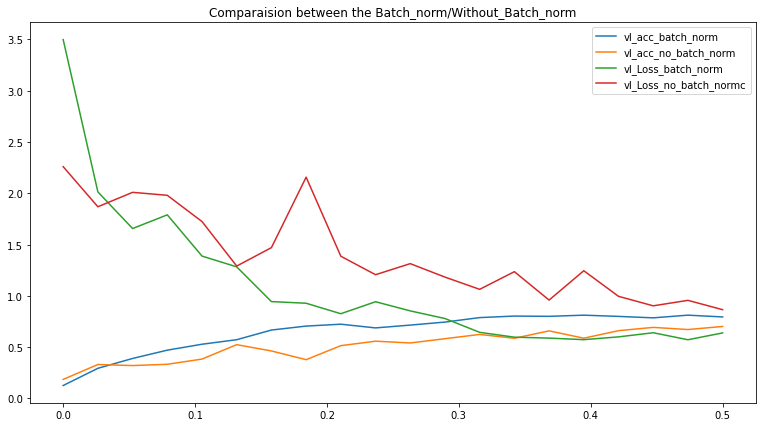

In [36]:
plt.figure(figsize=(13, 7))

x = np.linspace(0, .5, len(tl))   
plt.plot(x, vba, label='vl_acc_batch_norm')   
plt.plot(x, va, label='vl_acc_no_batch_norm')   
plt.plot(x, vbl, label='vl_Loss_batch_norm')  
plt.plot(x, vl, label='vl_Loss_no_batch_normc')  
plt.legend(fontsize=10)    
plt.title("Comparaision between the Batch_norm/Without_Batch_norm")   
plt.savefig(os.path.join(figures_path, 'Standard validation.png'), dpi=500, quality=100)  